The purpose of this notebook is to test if the functions in loader, models, utils and plotting are compatible with the current version of DeepTrack 2.0. The functions not tested here don't depend on DeepTrack 2.0.

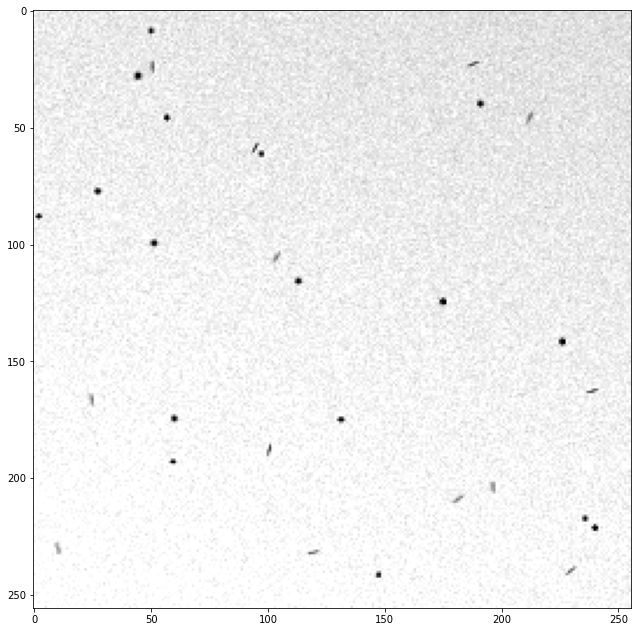

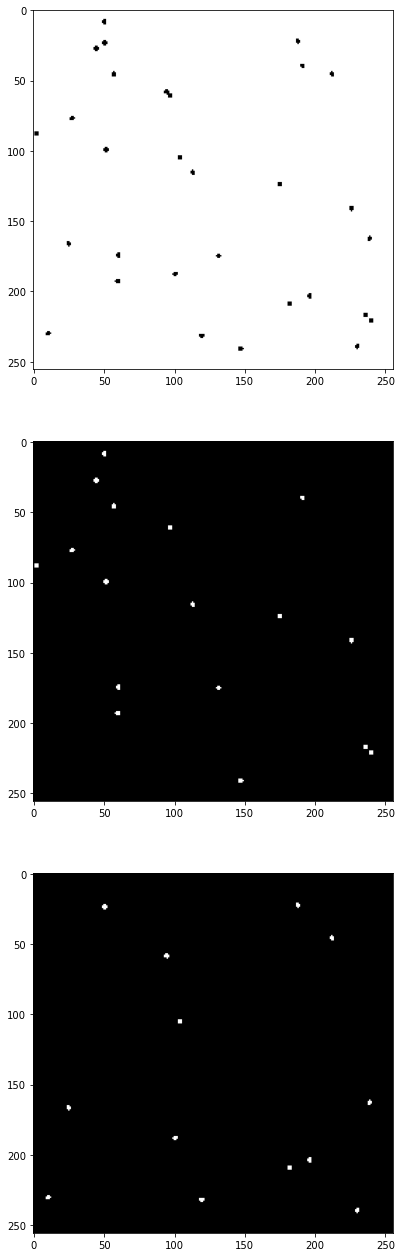

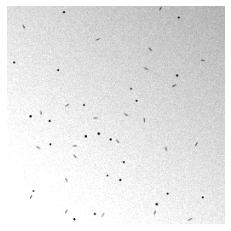

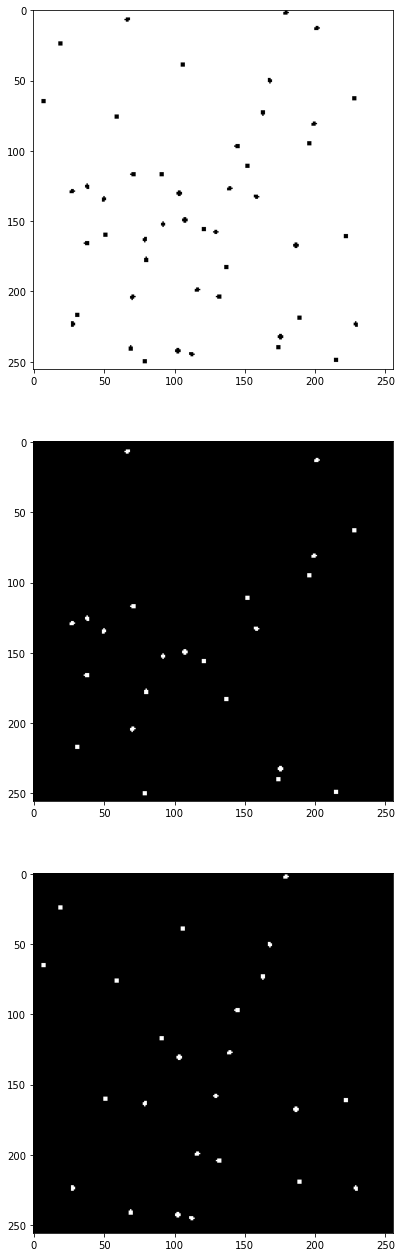

In [1]:
from loader import *
from models import *
from utils import *
from plotting import *


moving_plankton1 = moving_spherical_plankton(label=1)

stationary_plankton1 = stationary_spherical_plankton(label=0)

moving_plankton2 = moving_ellipsoid_plankton(label=0)

stationary_plankton2 = stationary_ellipsoid_plankton(label=1)


microscope = plankton_brightfield()


no_of_moving_plankton1 = lambda: np.random.randint(10, 20)
no_of_stationary_plankton1 = lambda: np.random.randint(10, 20)
no_of_moving_plankton2 = lambda: np.random.randint(10, 20)
no_of_stationary_plankton2 = lambda: np.random.randint(10, 20)

sample0 = stationary_plankton1**no_of_stationary_plankton1 + \
          stationary_plankton2**no_of_stationary_plankton2



noise_amp, norm_min, norm_max = 2, -0.2, 1.2
image = create_image(noise_amp, sample0, microscope, norm_min, norm_max)
label_function = get_target_image
batch_function = create_custom_batch_function(image, 
                                              outputs=[0], 
                                              function_img=[normalize_image])

plot_image(image)


plot_label(get_target_image, image)
sequential_moving_plankton1 = Sequential(
    moving_plankton1, position=get_position_moving_plankton)

sequential_stationary_plankton1 = Sequential(
    stationary_plankton1, position=get_position_stationary_plankton)

sequential_moving_plankton2 = Sequential(
    moving_plankton2, position=get_position_moving_plankton)

sequential_stationary_plankton2 = Sequential(
    stationary_plankton2, position=get_position_stationary_plankton)


sample1 = sequential_moving_plankton1**no_of_moving_plankton1 + \
            sequential_stationary_plankton1**no_of_stationary_plankton1 + \
            sequential_moving_plankton2**no_of_moving_plankton2 + \
            sequential_stationary_plankton2**no_of_stationary_plankton2


sequence = create_sequence(noise_amp, sample1, microscope, norm_min, norm_max)
sequence_length = 3
imaged_particle_sequence = Sequence(sequence, sequence_length=sequence_length)
imaged_particle_sequence.update()
imaged_particle_sequence.plot(cmap='gray');

batch_function1 = create_custom_batch_function(imaged_particle_sequence, 
                                              outputs=[0, 1, 2], 
                                              function_img=[normalize_image])
plot_label(get_target_sequence, imaged_particle_sequence)

The ouptut from the prediction will look like nonsense, we are only interested in testing if it works.

Generating 4 / 4 samples before starting training
Epoch 1/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 2/10
1/1 [==============================] - 0s 998us/step - loss: 0.0065
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 4/10
1/1 [==============================] - 0s 998us/step - loss: 0.0063
Epoch 5/10
1/1 [==============================] - 0s 33ms/step - loss: 0.0052
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 7/10
1/1 [==============================] - 0s 998us/step - loss: 0.0062
Epoch 8/10
1/1 [==============================] - 0s 997us/step - loss: 0.0061
Epoch 9/10
1/1 [==============================] - 0s 998us/step - loss: 0.0059
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 0.0062


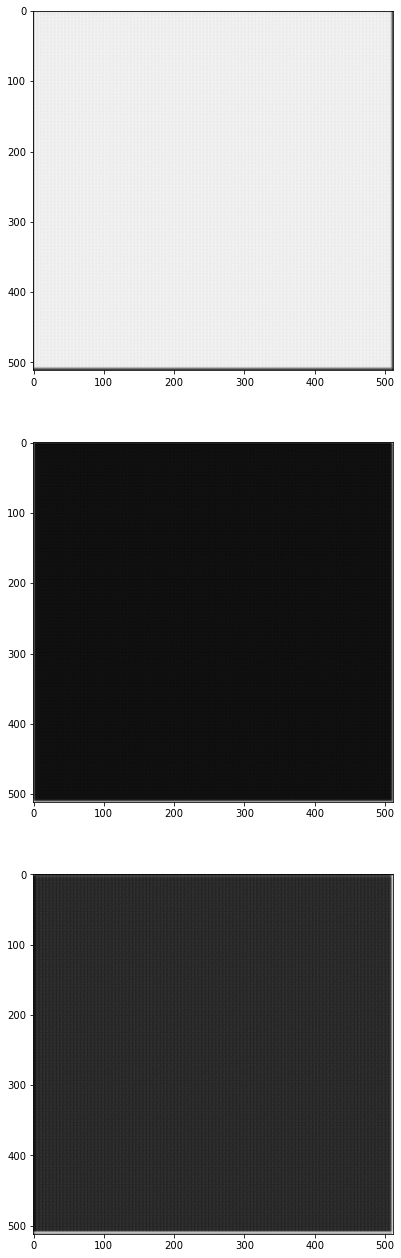

In [2]:
from deeptrack.generators import ContinuousGenerator
generator = ContinuousGenerator(
    imaged_particle_sequence,
    get_target_sequence,
    batch_function1,
    batch_size=2,
    min_data_size=4,
    max_data_size=20)

model = generate_unet(no_of_inputs=3, no_of_outputs=3)
model = train_model_early_stopping(model, generator, patience=10, 
                                   epochs=10, steps_per_epoch=1)

plot_prediction(model=model, im_stack=np.ones((1, 512, 512, 3)))

if not model.predict(np.ones((1, 512, 512, 3))).shape == (1, 512, 512, 3):
    print('Output from model.predict has wrong dimensions')